In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive (10).zip to archive (10).zip


In [2]:
pip install numpy pandas scikit-learn nltk matplotlib seaborn tensorflow

In [3]:
import pandas as pd
import zipfile

zip_file_path = 'archive (10).zip'

with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open('archive (10)/True.csv') as true_file:
        df_true = pd.read_csv(true_file)
    with z.open('archive (10)/Fake.csv') as fake_file:
        df_fake = pd.read_csv(fake_file)

df_true['label'] = 1
df_fake['label'] = 0

df = pd.concat([df_true, df_fake], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("✅ Combined Dataset Shape:", df.shape)
df.head()


✅ Combined Dataset Shape: (44898, 5)


,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
# Initialize a lemmatizer to reduce words to their base form
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))# Load the list of common English stopwords

def clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    cleaned = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(cleaned)

df['combined_text'] = df['title'] + " " + df['text']
df['cleaned_text'] = df['combined_text'].apply(clean_text)

print("✅ Cleaning Done!")
df[['title', 'cleaned_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


✅ Cleaning Done!


,title,cleaned_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,breaking gop chairman grassley enough demand t...
1,Failed GOP Candidates Remembered In Hilarious...,failed gop candidate remembered hilarious mock...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,mike penny new dc neighbor hilariously trollin...
3,California AG pledges to defend birth control ...,california ag pledge defend birth control insu...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,az rancher living u mexico border destroy nanc...


In [5]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data Split Done!")


✅ Data Split Done!


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import machine learning tools for text vectorization, model training, and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2)) # Convert cleaned text into numerical TF-IDF features, capturing word relevance and frequency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

lr = LogisticRegression(max_iter=200) # Train a Logistic Regression model capable of binary classification
lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf) # Generate predictions and evaluate model accuracy and detailed classification metrics
print("✅ Logistic Regression Model Trained!")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


✅ Logistic Regression Model Trained!
Accuracy: 0.9897550111358575

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [7]:
# Imports
# Imports
# Import numerical operations and machine learning modules.
# TensorFlow and Keras are used to construct and train an LSTM network.
# scikit-learn provides utilities for data splitting into training and testing sets.
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define hyperparameters controlling data processing and model training.
vocab_size = 10000        # max number of words in vocabulary
max_len = 200             # max sequence length
embedding_dim = 64
batch_size = 128
epochs = 3


X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=42
)

# Convert words into integer sequences that models can interpret.
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
# Transform text to integer sequences based on the trained tokenizer.
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# Pad or truncate sequences to a fixed length for uniform input shape.
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),# LSTM layer captures sequential relationships and context among words.
    Dense(32, activation='relu'), # Dense layer introduces non-linearity and learns intermediate patterns.
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])


history = model.fit(
    X_train_pad, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)


loss, acc = model.evaluate(X_test_pad, y_test)
print(f"\nTest Accuracy: {acc:.4f}")

model.save('lstm_model.h5')       # save LSTM
import joblib
joblib.dump(tokenizer, 'tokenizer.pkl')  # save tokenizer


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 164s 683ms/step - accuracy: 0.6953 - loss: 0.5355 - val_accuracy: 0.9317 - val_loss: 0.2444
Epoch 2/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 194s 678ms/step - accuracy: 0.9306 - loss: 0.2574 - val_accuracy: 0.9595 - val_loss: 0.1530
Epoch 3/3
225/225 ━━━━━━━━━━━━━━━━━━━━ 198s 661ms/step - accuracy: 0.9486 - loss: 0.2011 - val_accuracy: 0.9581 - val_loss: 0.1634
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - accuracy: 0.9561 - loss: 0.1664



Test Accuracy: 0.9571


['tokenizer.pkl']

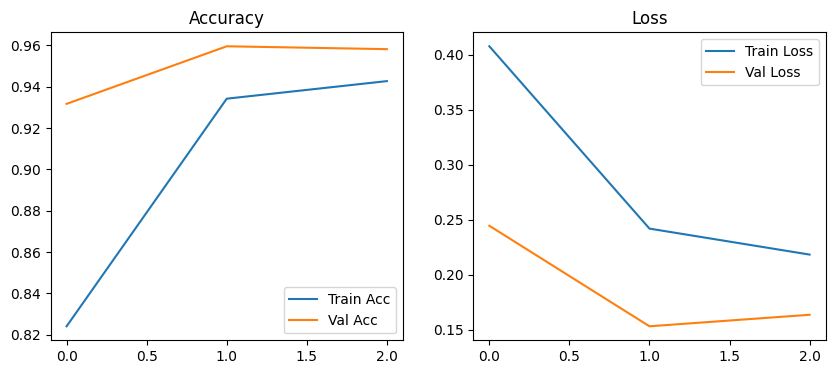

In [8]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [9]:
import joblib

# Save Logistic Regression model + TF-IDF
joblib.dump(lr, 'logistic_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save LSTM model + tokenizer
model.save('lstm_model.h5')         # H5 format is fine
joblib.dump(tokenizer, 'tokenizer.pkl')

print("✅ All models saved successfully!")


✅ All models saved successfully!


In [10]:
!pip install streamlit -q
!streamlit --version  # verify installation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.7 MB/s eta 0:00:00
Streamlit, version 1.50.0


In [11]:
%%writefile app.py
import streamlit as st
import joblib


lr = joblib.load('logistic_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')



st.title(" Fake News Detection App")

user_input = st.text_area("Enter a news article or headline:")

if st.button("Check Authenticity"):
    if user_input.strip():
        # Transform input using TF-IDF
        X_tfidf = vectorizer.transform([user_input])
        pred = lr.predict(X_tfidf)[0]
        conf = lr.predict_proba(X_tfidf)[0].max()

        if pred == 1:
            st.success(f"✅ This news seems **REAL**! (Confidence: {conf:.2f})")
        else:
            st.error(f"🚨 This news seems **FAKE**! (Confidence: {conf:.2f})")
    else:
        st.warning("Please enter some text to analyze.")


Writing app.py


In [12]:
!apt-get update -qq
!apt-get install -y wget
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Selecting previously unselected package cloudflared.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.10.0) ...
Setting up cloudflared (2025.10.0) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# Install Streamlit and cloudflared
!pip install streamlit -q
!apt-get update -qq
!apt-get install -y wget
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

import threading
import time


# Start Streamlit in background
def run_streamlit():
    !streamlit run app.py --server.port 8501 &

thread = threading.Thread(target=run_streamlit)
thread.start()

# Wait for Streamlit to start
time.sleep(10)

# Expose via cloudflared
!cloudflared tunnel --url http://localhost:8501

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
(Reading database ... 126679 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.10.0) over (2025.10.0) ...
Setting up cloudflared (2025.10.0) ...
Processing triggers for man-db (2.10.2-1) ...



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.2.20:8501

2025-10-17T02:58:18Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. Howev